# Forecasting (Airlines_Data)

### Forecast the Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting

# 1. Import Libs

In [6]:
import pandas as pd
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from datetime import datetime,time
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib
from pandas import DataFrame
from pandas import Grouper
from numpy import log
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pylab import rcParams
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
import itertools
import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [7]:
df = pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# 3. EDA

In [8]:
df.isna().sum()

Month         0
Passengers    0
dtype: int64

In [9]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [10]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


#### converte Month column to index

In [11]:
df.set_index('Month',inplace=True)

In [12]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [13]:
df.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Month')

In [15]:
df.isnull().sum()

Passengers    0
dtype: int64

#### found the 16 duplicated rows

In [16]:
df[df.duplicated()].shape

(16, 1)

In [17]:
df[df.duplicated()]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


#### removed the duplicated

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


In [20]:
DF = df.copy()

In [21]:
DF

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


In [22]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 1995-01-01 to 2002-11-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  80 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [23]:
DF.ndim

2

# 4. Visulization

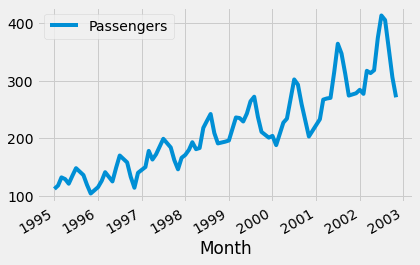

In [24]:
DF.plot()
plt.show()

#### here we can say that the trend is upward and the sessionality is multiplicative


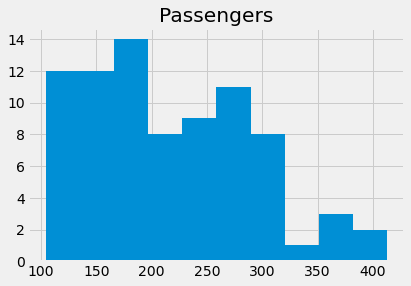

In [25]:
DF.hist()
plt.show()

#### density plot

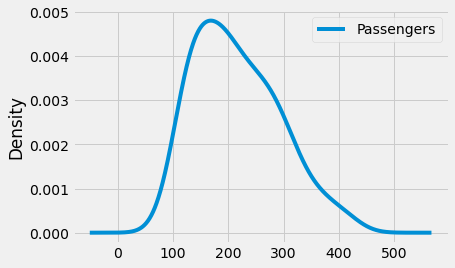

In [26]:
DF.plot(kind='kde')
plt.show()

#### Lag_plot

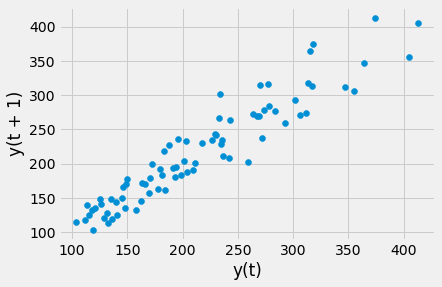

In [27]:
lag_plot(DF)
plt.show()

#### Autocorrelation Plot

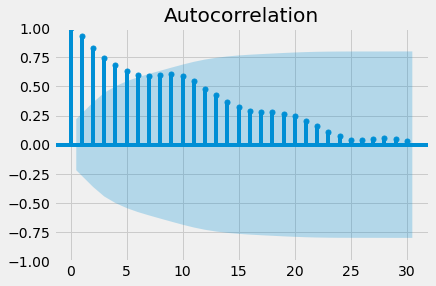

In [28]:
plot_acf(DF,lags=30)
plt.show()

### UpSampling

In [29]:
upsampled = DF.resample('M').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31         NaN
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31         NaN
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0
1996-04-30         NaN
1996-05-31       125.0
1996-06-30       149.0
1996-07-31       170.0
1996-08-31         NaN
1996-09-30       158.0
1996-10-31       133.0
1996-11-30       114.0
1996-12-31       140.0
1997-01-31       145.0
1997-02-28       150.0
1997-03-31       178.0
1997-04-30       163.0
1997-05-31       172.0
1997-06-30         NaN
1997-07-31       199.0
1997-08-31         NaN


#### interplation is done for nan values

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       142.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       109.5
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0


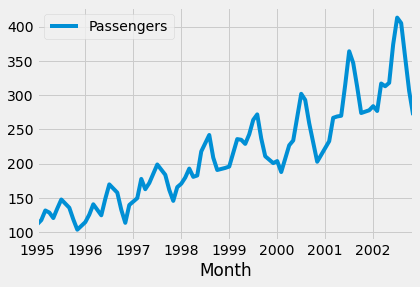

In [30]:
interpolated = upsampled.interpolate(method='linear') 
print(interpolated.head(15))
interpolated.plot()
plt.show()

In [31]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


# 5. Tranformations

## Square Root Transformation

In [33]:
dataframe = DataFrame(DF.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

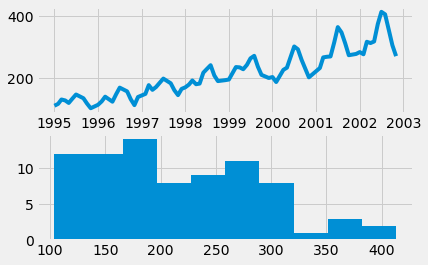

In [34]:
# line plot
plt.subplot(211)
plt.plot(DF['Passengers'])
# histogram
plt.subplot(212)
plt.hist(DF['Passengers'])
plt.show()

## Log Transform

In [35]:
dataframe = DataFrame(DF.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

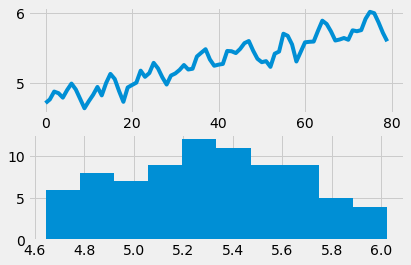

In [36]:
plt.subplot(211)
plt.plot(dataframe['Passengers'])
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

# Moving Average

In [37]:
Train = interpolated.head(81)
Test = interpolated.tail(14)

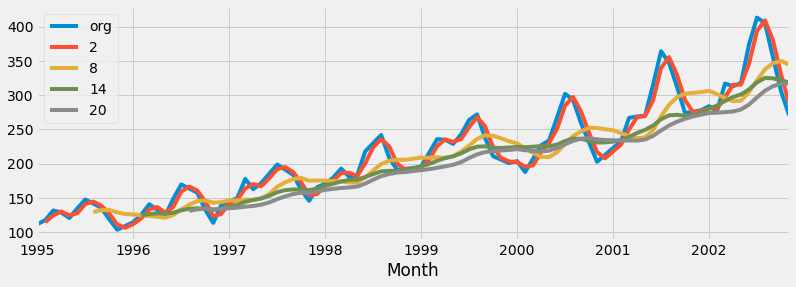

In [38]:
plt.figure(figsize=(12,4))
interpolated.Passengers.plot(label="org")
for i in range(2,24,6):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Time series decomposition plot


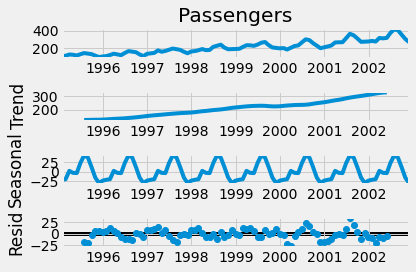

In [40]:
decompose_ts_add = seasonal_decompose(interpolated.Passengers,period=12)  
decompose_ts_add.plot()
plt.show()

## ACF plots and PACF plots

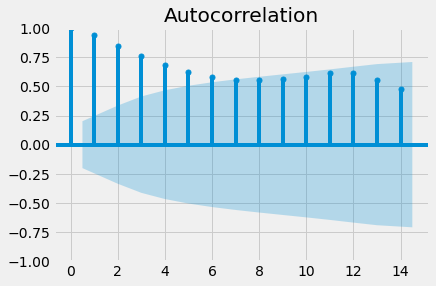

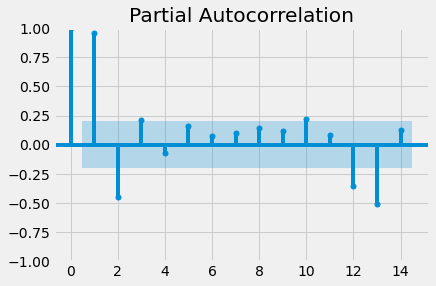

In [41]:
tsa_plots.plot_acf(interpolated.Passengers,lags=14)
tsa_plots.plot_pacf(interpolated.Passengers,lags=14)
plt.show()

## Evaluation Metric MAPE

In [42]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple Exponential Method


In [43]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

11.18163872245304

## Holt method

In [44]:
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

12.424434303922729

### Holts winter exponential smoothing with additive seasonality and additive trend

In [45]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

3.513732035746134

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [46]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

3.233263960121953

In [47]:
rmse_hwe_mul_add = sqrt(mean_squared_error(pred_hwe_mul_add,Test.Passengers))
rmse_hwe_mul_add

12.632692127672167

# Final Model by combining train and test


In [48]:
hwe_model_add_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="add",trend="add",seasonal_periods=10).fit()

### Forecasting for next 10 time periods

In [49]:
hwe_model_add_add.forecast(10)

2002-12-31    276.693521
2003-01-31    285.590883
2003-02-28    287.549296
2003-03-31    293.403027
2003-04-30    294.184750
2003-05-31    293.895109
2003-06-30    290.210198
2003-07-31    288.263328
2003-08-31    290.144521
2003-09-30    289.689357
Freq: M, dtype: float64

In [51]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


In [52]:
interpolated.reset_index(inplace=True)

In [53]:
interpolated['t'] = 1

In [54]:
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,1
2,1995-03-31,132.0,1
3,1995-04-30,129.0,1
4,1995-05-31,121.0,1
...,...,...,...
90,2002-07-31,413.0,1
91,2002-08-31,405.0,1
92,2002-09-30,355.0,1
93,2002-10-31,306.0,1


In [55]:
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1

In [56]:
interpolated


,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,2
2,1995-03-31,132.0,3
3,1995-04-30,129.0,4
4,1995-05-31,121.0,5
...,...,...,...
90,2002-07-31,413.0,91
91,2002-08-31,405.0,92
92,2002-09-30,355.0,93
93,2002-10-31,306.0,94


#### inserted t_sq column with values

In [57]:
interpolated['t_sq'] = (interpolated['t'])**2

In [58]:
interpolated

,Month,Passengers,t,t_sq
0,1995-01-31,112.0,1,1
1,1995-02-28,118.0,2,4
2,1995-03-31,132.0,3,9
3,1995-04-30,129.0,4,16
4,1995-05-31,121.0,5,25
...,...,...,...,...
90,2002-07-31,413.0,91,8281
91,2002-08-31,405.0,92,8464
92,2002-09-30,355.0,93,8649
93,2002-10-31,306.0,94,8836


In [59]:
interpolated["month"] = interpolated.Month.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.Month.dt.strftime("%Y") # Year extraction

In [60]:
interpolated

,Month,Passengers,t,t_sq,month,year
0,1995-01-31,112.0,1,1,Jan,1995
1,1995-02-28,118.0,2,4,Feb,1995
2,1995-03-31,132.0,3,9,Mar,1995
3,1995-04-30,129.0,4,16,Apr,1995
4,1995-05-31,121.0,5,25,May,1995
...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002
91,2002-08-31,405.0,92,8464,Aug,2002
92,2002-09-30,355.0,93,8649,Sep,2002
93,2002-10-31,306.0,94,8836,Oct,2002


In [61]:
months = pd.get_dummies(interpolated['month']) 

In [62]:
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,0,0,0,0,1,0,0,0,0,0,0
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0


In [63]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [64]:
Airlines = pd.concat([interpolated,months],axis=1)

In [65]:
Airlines.head()

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0


In [66]:
Airlines['log_passengers'] = np.log(Airlines['Passengers'])

In [67]:
Airlines

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0,6.023448
91,2002-08-31,405.0,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,2002-09-30,355.0,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,2002-10-31,306.0,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585


<AxesSubplot:xlabel='month', ylabel='year'>

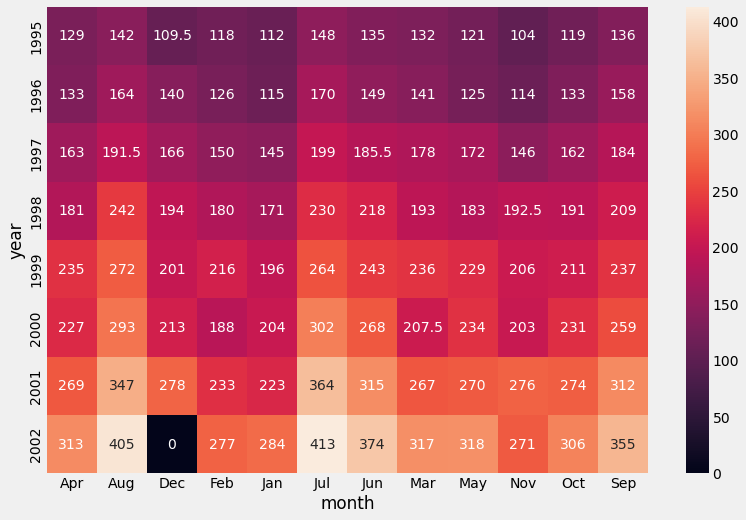

In [68]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

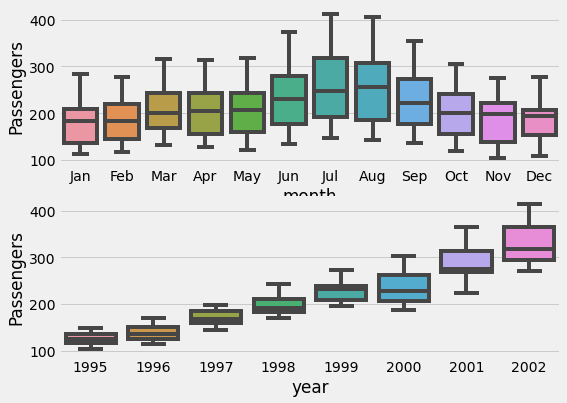

In [70]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data= Airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

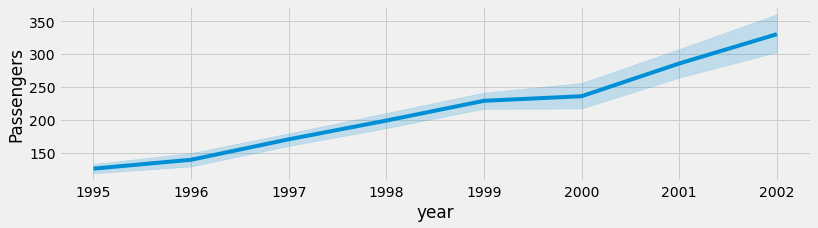

In [71]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airlines)

# 6. Comparing Multiple Models

In [72]:
Train = Airlines.head(81) 
Test = Airlines.tail(14)

## Linear Model

In [73]:
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.87107195088723

## Exponential Model

In [74]:
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.37179623821827

## Quadratic Model

In [75]:
Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

42.709870425152

## Additive seasonality 

In [76]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

130.55762388601403

## Additive Seasonality Quadratic 

In [77]:
add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.7853719115231

## Multiplicative Seasonality

In [78]:
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

137.28596175917107

## Multiplicative Additive Seasonality 

In [79]:
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

13.188070730263902

## Compareing the results 

In [80]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,13.188071
4,rmse_add_sea_quad,26.785372
1,rmse_Exp,42.371796
2,rmse_Quad,42.709870
0,rmse_linear,47.871072
3,rmse_add_sea,130.557624
5,rmse_Mult_sea,137.285962
